# Crime data from 2012

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2012'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 10 columns):
Date             127771 non-null datetime64[ns]
Hour             127771 non-null int64
Offense Type     127771 non-null object
Beat             127771 non-null object
Premise          127771 non-null object
Block Range      127771 non-null object
Street Name      127771 non-null object
Type             127771 non-null object
Suffix           127771 non-null object
# Of Offenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [7]:
df.head(2)

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Date             0
Hour             0
Offense Type     0
Beat             0
Premise          0
Block Range      0
Street Name      0
Type             0
Suffix           0
# Of Offenses    0
dtype: int64

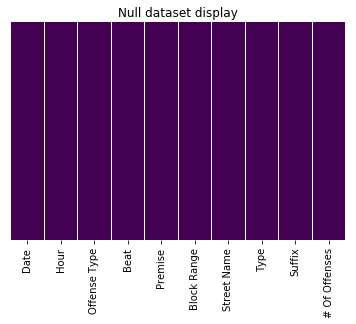

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- joining similar columns
- renaming

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,date,hour,offense type,beat,premise,block range,street name,type,suffix,# of offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01,23,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21,23,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01,6,Murder,3B10,20A,4200-4299,34TH,ST,W,1


In [12]:
df.rename(columns={
    '# of offenses': 'num_offenses',
     'offense type': 'offense_type',
    'block range': 'block_range',
    'street name': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 10 columns):
date            127771 non-null datetime64[ns]
hour            127771 non-null int64
offense_type    127771 non-null object
beat            127771 non-null object
premise         127771 non-null object
block_range     127771 non-null object
street_name     127771 non-null object
type            127771 non-null object
suffix          127771 non-null object
num_offenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [13]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,suffix,num_offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01,23,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21,23,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01,6,Murder,3B10,20A,4200-4299,34TH,ST,W,1


## Drop columns

In [14]:
df.drop(['suffix','type'],axis=1, inplace=True)

In [15]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses
0,2012-04-05,2,Murder,17E40,20R,6100-6199,CLARIDGE,1
1,2012-04-04,22,Murder,3B10,18A,11700-11799,HEMPSTEAD,1
2,2012-04-01,23,Murder,19G10,20A,7500-7599,CORPORATE,1
3,2012-04-21,23,Murder,8C10,20R,6200-6299,RIETTA,1
4,2012-04-01,6,Murder,3B10,20A,4200-4299,34TH,1


## Premise cleanup

In [16]:
df.premise.unique()

array(['20R', '18A', '20A', '13R', '20D', '250', '18B', '20C', '20V',
       '01B', '20P', '140', '18O', '11R', '22M', '18N', '080', '05D',
       '24F', '02B', '24E', '05L', '24P', '05Z', '18C', '13B', '210',
       '070', '18T', '05B', '120', '09D', '03B', '100', '24A', '23S',
       '05O', '18R', '240', '24C', '02S', '18U', '18G', '22H', '18P',
       '18M', '03S', '13H', '13S', '20G', '09P', 'N', '05C', '040', '05P',
       '---', '05Q', '05R', '170', '09H', '12V', '22E', '05S', '11F',
       '18W', '060', '11G', '20M', '18D', '160', '05E', '20N', '05H',
       '22P', '05Y', '190', '25V', '05W', '22D', '24J', '24V', '20W',
       '20L', '05F', '05G', '05N', '09R', '05V', '05X', '24M', '21V',
       '11L', '19V', '24T', '11P', '18H', '18S', '01P', '01A', '24S',
       '22U', '18L', '05M', '01K', '11C', '05A', '150', '24B', '05U',
       '24G', '20H', '11S', '11V', '13A', '02C', '13T', '25R', '05T',
       '06', '01T', '14V', '22C', '04V', '22V', '09V', '13C'],
      dtype=object)

In [17]:
df.premise = df.premise.str.strip()

In [18]:
df.premise.unique()

array(['20R', '18A', '20A', '13R', '20D', '250', '18B', '20C', '20V',
       '01B', '20P', '140', '18O', '11R', '22M', '18N', '080', '05D',
       '24F', '02B', '24E', '05L', '24P', '05Z', '18C', '13B', '210',
       '070', '18T', '05B', '120', '09D', '03B', '100', '24A', '23S',
       '05O', '18R', '240', '24C', '02S', '18U', '18G', '22H', '18P',
       '18M', '03S', '13H', '13S', '20G', '09P', 'N', '05C', '040', '05P',
       '---', '05Q', '05R', '170', '09H', '12V', '22E', '05S', '11F',
       '18W', '060', '11G', '20M', '18D', '160', '05E', '20N', '05H',
       '22P', '05Y', '190', '25V', '05W', '22D', '24J', '24V', '20W',
       '20L', '05F', '05G', '05N', '09R', '05V', '05X', '24M', '21V',
       '11L', '19V', '24T', '11P', '18H', '18S', '01P', '01A', '24S',
       '22U', '18L', '05M', '01K', '11C', '05A', '150', '24B', '05U',
       '24G', '20H', '11S', '11V', '13A', '02C', '13T', '25R', '05T',
       '06', '01T', '14V', '22C', '04V', '22V', '09V', '13C'],
      dtype=object)

## replace 06 with 060

In [19]:
df.premise.replace({'06':'060'}, inplace=True)

In [20]:
len(df.premise.unique())

125

In [21]:
df.premise.unique()

array(['20R', '18A', '20A', '13R', '20D', '250', '18B', '20C', '20V',
       '01B', '20P', '140', '18O', '11R', '22M', '18N', '080', '05D',
       '24F', '02B', '24E', '05L', '24P', '05Z', '18C', '13B', '210',
       '070', '18T', '05B', '120', '09D', '03B', '100', '24A', '23S',
       '05O', '18R', '240', '24C', '02S', '18U', '18G', '22H', '18P',
       '18M', '03S', '13H', '13S', '20G', '09P', 'N', '05C', '040', '05P',
       '---', '05Q', '05R', '170', '09H', '12V', '22E', '05S', '11F',
       '18W', '060', '11G', '20M', '18D', '160', '05E', '20N', '05H',
       '22P', '05Y', '190', '25V', '05W', '22D', '24J', '24V', '20W',
       '20L', '05F', '05G', '05N', '09R', '05V', '05X', '24M', '21V',
       '11L', '19V', '24T', '11P', '18H', '18S', '01P', '01A', '24S',
       '22U', '18L', '05M', '01K', '11C', '05A', '150', '24B', '05U',
       '24G', '20H', '11S', '11V', '13A', '02C', '13T', '25R', '05T',
       '01T', '14V', '22C', '04V', '22V', '09V', '13C'], dtype=object)

## Premise

In [22]:
premise_data = pd.read_csv(premise_dataset)
#premise_data.columns = map(str.lower, premise_data.columns)
premise_data.columns = ['premise','premise_description']
premise_data.head()

,premise,premise_description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [23]:
premise_data.premise.unique()

array(['01A', '01B', '01K', '01P', '01R', '01T', '02B', '02C', '02S',
       '02V', '03B', '03S', '040', '04V', '05A', '05B', '05C', '05D',
       '05E', '05F', '05G', '05H', '05L', '05M', '05N', '05O', '05P',
       '05Q', '05R', '05S', '05T', '05U', '05V', '05W', '05X', '05Y',
       '05Z', '060', '070', '080', '09D', '09H', '09P', '09R', '09V',
       '100', '11C', '11F', '11G', '11L', '11P', '11R', '11S', '11V',
       '120', '12V', '13A', '13B', '13C', '13H', '13R', '13S', '13T',
       '140', '14V', '150', '15V', '160', '170', '18A', '18B', '18C',
       '18D', '18G', '18H', '18L', '18M', '18N', '18O', '18P', '18R',
       '18S', '18T', '18U', '18W', '190', '19V', '20A', '20C', '20D',
       '20G', '20H', '20L', '20M', '20N', '20P', '20R', '20V', '20W',
       '210', '21V', '22C', '22D', '22E', '22H', '22M', '22P', '22U',
       '22V', '23S', '240', '24A', '24B', '24C', '24E', '24F', '24G',
       '24J', '24M', '24P', '24S', '24T', '24V', '250', '25R', '25V'],
      dtype=object)

In [ ]:
df.head()

In [24]:
df = pd.merge(df, premise_data, on='premise', how='outer')

In [25]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,num_offenses,premise_description
0,2012-04-05,2.0,Murder,17E40,20R,6100-6199,CLARIDGE,1.0,RESIDENCE/HOUSE
1,2012-04-21,23.0,Murder,8C10,20R,6200-6299,RIETTA,1.0,RESIDENCE/HOUSE
2,2012-04-30,8.0,Murder,7C20,20R,4000-4099,LIBERTY,1.0,RESIDENCE/HOUSE
3,2012-04-12,4.0,Rape,7C50,20R,19400-19499,BORDERS,1.0,RESIDENCE/HOUSE
4,2012-04-23,8.0,Rape,16E20,20R,4100-4199,KNOTTY OAKS,1.0,RESIDENCE/HOUSE


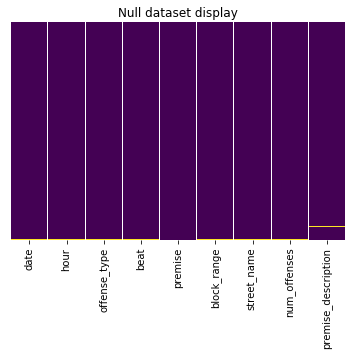

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [ ]:
df.premise.value_counts(dropna=False)

## Drop premise column

In [27]:
df.drop(['premise'],axis=1, inplace=True)

## Rename premise_description to premise

In [28]:
df.rename(columns={
    'premise_description': 'premise',
}, inplace=True)

In [29]:
df.head()

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
0,2012-04-05,2.0,Murder,17E40,6100-6199,CLARIDGE,1.0,RESIDENCE/HOUSE
1,2012-04-21,23.0,Murder,8C10,6200-6299,RIETTA,1.0,RESIDENCE/HOUSE
2,2012-04-30,8.0,Murder,7C20,4000-4099,LIBERTY,1.0,RESIDENCE/HOUSE
3,2012-04-12,4.0,Rape,7C50,19400-19499,BORDERS,1.0,RESIDENCE/HOUSE
4,2012-04-23,8.0,Rape,16E20,4100-4199,KNOTTY OAKS,1.0,RESIDENCE/HOUSE


# Null values

In [30]:
df.apply(lambda x: sum(x.isnull()))

date              3
hour              3
offense_type      3
beat              3
block_range       3
street_name       3
num_offenses      3
premise         608
dtype: int64

In [31]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
120796,2012-09-25,0.0,Theft,3B40,500-599,GARDEN OAKS,1.0,NaN
120797,2012-09-25,23.0,Theft,1A50,3900-3999,ALABAMA,1.0,NaN
120798,2012-09-28,8.0,Theft,1A50,4300-4399,SAN FELIPE,1.0,NaN
120799,2012-09-28,16.0,Theft,18F20,3100-3199,POST OAK,1.0,NaN
120800,2012-09-28,12.0,Theft,6B50,15900-15999,SELLERS,1.0,NaN
120801,2012-09-29,13.0,Theft,7C20,3300-3399,LOCKWOOD,1.0,NaN
120802,2012-09-29,17.0,Theft,10H80,2500-2599,DUNSTAN,1.0,NaN
127771,NaT,NaN,NaN,NaN,NaN,NaN,NaN,LIGHT RAIL VEHICLE
127772,NaT,NaN,NaN,NaN,NaN,NaN,NaN,VACANT BANK
127773,NaT,NaN,NaN,NaN,NaN,NaN,NaN,VACANT JAIL/PRISON


### Drop rows with more than 3 null values

In [32]:
df.dropna(thresh=3,inplace=True)

### Replace null values on premise_code to 'none'

In [34]:
df.premise.fillna('UNK',inplace=True)

In [35]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
block_range     0
street_name     0
num_offenses    0
premise         0
dtype: int64

# Inspect each column

## `num_offenses`

In [36]:
df.num_offenses.value_counts(dropna=False)

1.0    126502
2.0      1050
3.0       202
4.0        11
5.0         3
7.0         1
6.0         1
8.0         1
Name: num_offenses, dtype: int64

In [37]:
df.num_offenses.dtype

dtype('float64')

### Change the type from float to integer

In [38]:
df.num_offenses = df.num_offenses.astype('int')

In [39]:
df.num_offenses.dtype

dtype('int64')

In [40]:
df.num_offenses.value_counts(dropna=False)

1    126502
2      1050
3       202
4        11
5         3
8         1
7         1
6         1
Name: num_offenses, dtype: int64

## `beat`

In [41]:
len(df.beat.value_counts(dropna='False'))

121

In [42]:
df.beat.unique()

array(['17E40', '8C10', '7C20', '7C50', '16E20', '10H10', '2A10', '6B10',
       '7C10', '1A10', '3B10', '3B40', '6B30', '20G70', '3B50', '14D10',
       '15E20', '14D30', '11H30', '10H50', '19G30', '12D10', '14D20',
       '19G40', '16E10', '12D20', '3B30', '13D10', '17E20', '12D40',
       '5F30', '6B20', '18F50', '8C40', '18F10', '5F20', '8C60', '6B40',
       '12D60', '15E30', '8C30', '19G20', '8C50', '17E30', '14D40',
       '12D70', '9C40', '8C20', '10H40', '20G80', '11H40', '20G40',
       '2A30', '16E40', '7C30', '13D20', '2A20', '2A50', '10H20', '16E30',
       '20G50', '15E10', '10H60', '6B50', '11H20', '11H10', '9C30',
       '9C20', '13D40', '20G20', '18F60', '24C30', '4F20', '5F10', '4F30',
       '1A20', '17E10', '19G50', '18F20', '24C10', '4F10', '2A40', '1A30',
       '18F30', '20G30', '18F40', '24C60', '19G10', '1A40', '10H80',
       '7C40', '5F40', '2A60', '9C10', '20G60', '14D50', '23J40', '10H70',
       '13D30', '10H30', '11H50', '12D50', '6B60', '24C20', '1A50',


In [43]:
df.beat = df.beat.str.strip()

In [44]:
len(df.beat.unique())

121

## `block_range`

In [45]:
len(df.block_range.unique())

243

In [46]:
df.block_range = df.block_range.str.strip()

In [47]:
len(df.block_range.unique())

243

## `date`

In [48]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [49]:
df.hour.value_counts(dropna=False)

18.0    7907
12.0    7408
22.0    7305
20.0    7210
19.0    7199
17.0    7079
0.0     7056
21.0    6885
15.0    6212
16.0    6041
23.0    5770
14.0    5692
13.0    5430
8.0     5238
10.0    5082
11.0    5058
9.0     4735
7.0     4217
1.0     3535
2.0     3349
6.0     2876
3.0     2538
4.0     1981
5.0     1968
Name: hour, dtype: int64

In [50]:
df.hour.dtype

dtype('float64')

## Change dtype 

In [51]:
df.hour = df.hour.astype('int')

In [52]:
df.hour.dtype

dtype('int64')

In [53]:
df.hour.value_counts(dropna=False)

18    7907
12    7408
22    7305
20    7210
19    7199
17    7079
0     7056
21    6885
15    6212
16    6041
23    5770
14    5692
13    5430
8     5238
10    5082
11    5058
9     4735
7     4217
1     3535
2     3349
6     2876
3     2538
4     1981
5     1968
Name: hour, dtype: int64

## `offense_type`

In [54]:
df.offense_type.value_counts(dropna=False)

Theft                 67978
Burglary              26630
Auto Theft            12672
Aggravated Assault    10238
Robbery                9385
Rape                    663
Murder                  205
Name: offense_type, dtype: int64

In [55]:
df.offense_type.unique()

array(['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary',
       'Auto Theft', 'Theft'], dtype=object)

## `street_name`

In [56]:
len(df.street_name.value_counts(dropna=False))

7553

In [57]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER          3534
GESSNER             2000
GULF                1909
RICHMOND            1786
NORTH               1738
SOUTHWEST           1312
MAIN                1290
WEST SAM HOUSTON    1242
BELLAIRE            1242
KATY                1236
Name: street_name, dtype: int64

In [58]:
df.street_name.unique()

array(['CLARIDGE', 'RIETTA', 'LIBERTY', ..., 'DRYSDALE', 'FLETA',
       'SPRUCE HILL'], dtype=object)

In [59]:
df.street_name = df.street_name.str.strip()  # no need

In [60]:
len(df.street_name.value_counts(dropna=False))

7553

## Organiaze columns

In [61]:
df.head()

,date,hour,offense_type,beat,block_range,street_name,num_offenses,premise
0,2012-04-05,2,Murder,17E40,6100-6199,CLARIDGE,1,RESIDENCE/HOUSE
1,2012-04-21,23,Murder,8C10,6200-6299,RIETTA,1,RESIDENCE/HOUSE
2,2012-04-30,8,Murder,7C20,4000-4099,LIBERTY,1,RESIDENCE/HOUSE
3,2012-04-12,4,Rape,7C50,19400-19499,BORDERS,1,RESIDENCE/HOUSE
4,2012-04-23,8,Rape,16E20,4100-4199,KNOTTY OAKS,1,RESIDENCE/HOUSE


In [63]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses']

In [64]:
df = df.reindex(columns=cols)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127771 entries, 0 to 127770
Data columns (total 8 columns):
date            127771 non-null datetime64[ns]
hour            127771 non-null int64
beat            127771 non-null object
offense_type    127771 non-null object
block_range     127771 non-null object
street_name     127771 non-null object
premise         127771 non-null object
num_offenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.8+ MB


In [67]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
0,2012-04-05,2,17E40,Murder,6100-6199,CLARIDGE,RESIDENCE/HOUSE,1
1,2012-04-21,23,8C10,Murder,6200-6299,RIETTA,RESIDENCE/HOUSE,1
2,2012-04-30,8,7C20,Murder,4000-4099,LIBERTY,RESIDENCE/HOUSE,1
3,2012-04-12,4,7C50,Rape,19400-19499,BORDERS,RESIDENCE/HOUSE,1
4,2012-04-23,8,16E20,Rape,4100-4199,KNOTTY OAKS,RESIDENCE/HOUSE,1


## Display Null values

In [68]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    0
block_range     0
street_name     0
premise         0
num_offenses    0
dtype: int64

## Save clean data

In [69]:
data_directory_saves

'../data/clean_data/'

In [70]:
df.to_csv(data_directory_saves+'crime_2012.csv')